In [ ]:
import numpy as np
import rasterio
from skimage.util.shape import view_as_windows
from scipy.stats import mode

def majority_filter(image, window_size=5):
    """Apply a majority filter to the image using a sliding window."""
    pad_width = window_size // 2
    padded_image = np.pad(image, pad_width, mode='reflect')
    windows = view_as_windows(padded_image, (window_size, window_size))
    
    # Compute majority class for each window
    majority_classes = mode(windows, axis=(2, 3)).mode.squeeze()
    
    return majority_classes

# RF
classified_image_path = 'sample_output_classified_image_RF.tif'
with rasterio.open(classified_image_path) as src:
    classified_image = src.read(1)
    src_profile = src.profile

# Apply the majority filter
filtered_classified_image = majority_filter(classified_image, window_size=5)

# Save the filtered classified image
filtered_image_path = 'sample_output_filtered_classified_image_RF.tif'
with rasterio.open(
        filtered_image_path,
        'w',
        driver='GTiff',
        height=filtered_classified_image.shape[0],
        width=filtered_classified_image.shape[1],
        count=1,
        dtype=filtered_classified_image.dtype,
        crs=src_profile['crs'],
        transform=src_profile['transform'],
    ) as dst:
        dst.write(filtered_classified_image, 1)

#SVM
classified_image_path = 'sample_output_classified_image_SVM.tif'
with rasterio.open(classified_image_path) as src:
    classified_image = src.read(1)
    src_profile = src.profile

# Apply the majority filter
filtered_classified_image = majority_filter(classified_image, window_size=5)

# Save the filtered classified image
filtered_image_path = 'sample_output_filtered_classified_image_SVM.tif'
with rasterio.open(
        filtered_image_path,
        'w',
        driver='GTiff',
        height=filtered_classified_image.shape[0],
        width=filtered_classified_image.shape[1],
        count=1,
        dtype=filtered_classified_image.dtype,
        crs=src_profile['crs'],
        transform=src_profile['transform'],
    ) as dst:
        dst.write(filtered_classified_image, 1)

#XGBoost
classified_image_path = 'sample_output_classified_image_XGB.tif'
with rasterio.open(classified_image_path) as src:
    classified_image = src.read(1)
    src_profile = src.profile

# Apply the majority filter
filtered_classified_image = majority_filter(classified_image, window_size=5)

# Save the filtered classified image
filtered_image_path = 'sample_output_filtered_classified_image_XGB.tif'
with rasterio.open(
        filtered_image_path,
        'w',
        driver='GTiff',
        height=filtered_classified_image.shape[0],
        width=filtered_classified_image.shape[1],
        count=1,
        dtype=filtered_classified_image.dtype,
        crs=src_profile['crs'],
        transform=src_profile['transform'],
    ) as dst:
        dst.write(filtered_classified_image, 1)

#NeuralNetwork
classified_image_path = 'sample_output_classified_image_NN.tif'
with rasterio.open(classified_image_path) as src:
    classified_image = src.read(1)
    src_profile = src.profile

#Apply the majority filter
filtered_classified_image = majority_filter(classified_image, window_size=5)

# Save the filtered classified image
filtered_image_path = 'sample_output_filtered_classified_image_NN.tif'
with rasterio.open(
        filtered_image_path,
        'w',
        driver='GTiff',
        height=filtered_classified_image.shape[0],
        width=filtered_classified_image.shape[1],
        count=1,
        dtype=filtered_classified_image.dtype,
        crs=src_profile['crs'],
        transform=src_profile['transform'],
    ) as dst:
        dst.write(filtered_classified_image, 1)

print("Filtered classified images saved successfully.")

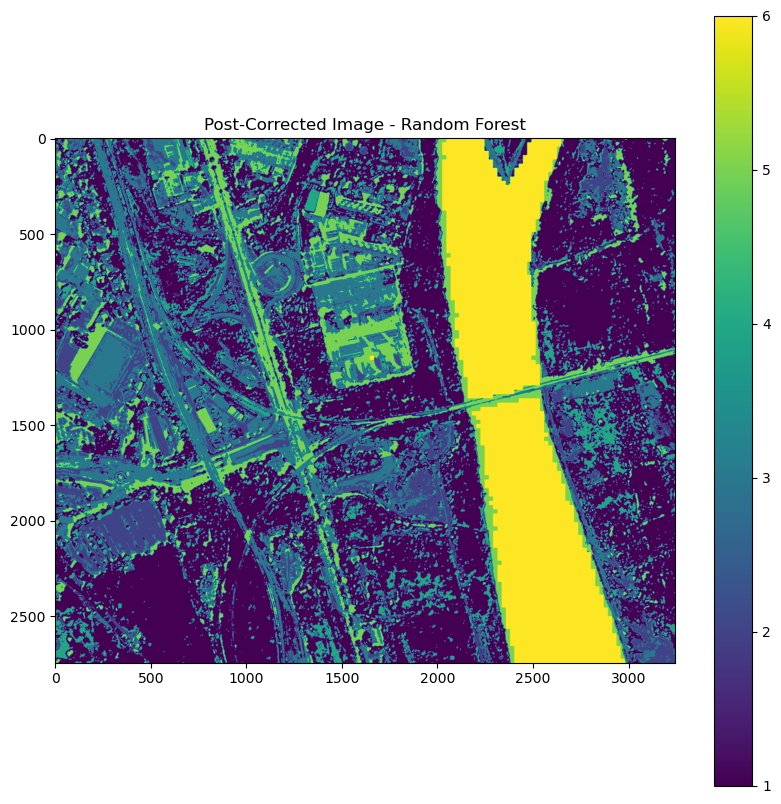

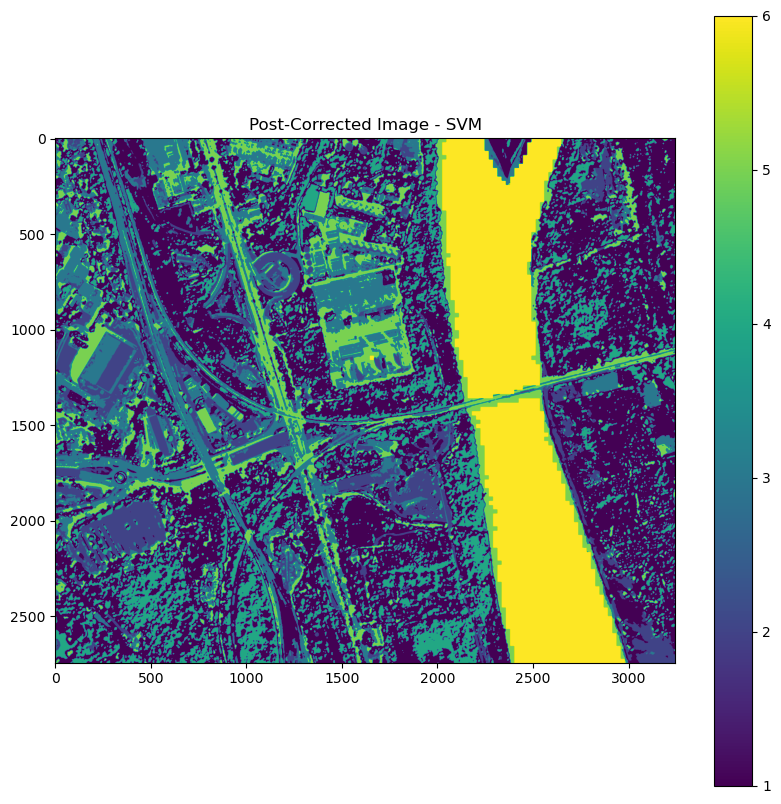

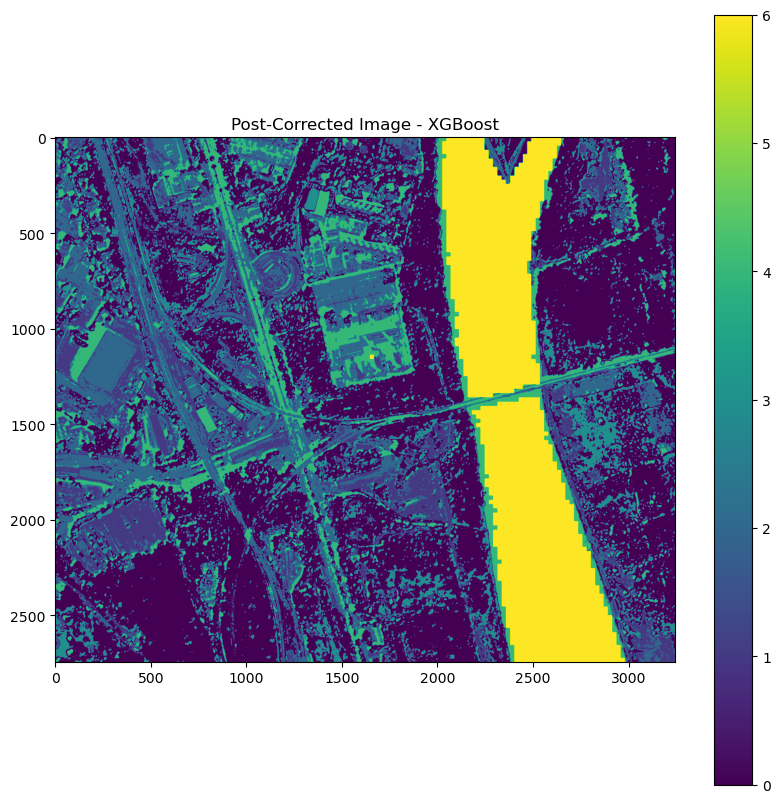

In [2]:
# Display Function
import matplotlib as plt
import matplotlib.pyplot as plt
def display_image(image_path, title):
    """Display a raster image."""
    with rasterio.open(image_path) as src:
        image = src.read(1)  # Assuming single-band TIF
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='viridis')
    plt.title(title)
    plt.colorbar()
    plt.show()

FILTERED_RF = "sample_output_filtered_classified_image_RF.tif"
FILTERED_SVM = "sample_output_filtered_classified_image_SVM.tif"
FILTERED_XGB = "sample_output_filtered_classified_image_XGB.tif"
#FILTERED_NN = "sample_output_filtered_classified_image_NN.tif"

display_image(FILTERED_RF, "Post-Corrected Image - Random Forest")
display_image(FILTERED_SVM, "Post-Corrected Image - SVM")
display_image(FILTERED_XGB, "Post-Corrected Image - XGBoost")
#display_image(FILTERED_NN, "Post-Corrected Image - Neural Network")